In [27]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.dorothea        import Dorothea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.core import fit_functions as fitf


In [28]:
run = 4446
ic_data = os.path.join(os.environ['IC_DATA'])
#pmap_path = ic_data + 'Montecarlo/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'
pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/dorothea.conf'


In [29]:
# initialize dorothea
PATH_IN  = os.path.join(pmap_path)
PATH_OUT = os.path.join('/Users/alej/Desktop/dorothea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = 4446,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 nmax       = 100000))
dorothea = Dorothea(**conf)

In [30]:
dorothea.run()


                 Dorothea will run a max of 100000 events
                 Input Files = ['/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5']
                 Output File = /Users/alej/Desktop/dorothea/garbage.h5
                          
Opening /Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5... event in file = 4, total = 1
event in file = 6, total = 2
event in file = 8, total = 3
event in file = 9, total = 4
event in file = 14, total = 5
event in file = 24, total = 6
event in file = 25, total = 7
event in file = 33, total = 8
event in file = 35, total = 9
event in file = 40, total = 10
event in file = 44, total = 11
event in file = 47, total = 12
event in file = 52, total = 13
event in file = 55, total = 14
event in file = 57, total = 15
event in file = 70, total = 16
event in file = 73, total = 17
event in file = 75, total = 18
event in file = 77, total = 19
event in file = 83, total = 20
event in file = 87, total = 21
event in file = 88, total = 22
event in f

dorothea: (counter = nmax, value = 100000),  (counter = n_events_tot, value = 1700),  (counter = nevt_out, value = 520), 

In [31]:
dst = load_dst(PATH_OUT, "DST", "Events")
dst

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,312804,1.498886e+09,0,1,200.0,2.674046,13.894978,461275.0,11.9625,2734.357422,...,653500.0,9,192.225,192.225,-61.139655,33.240564,69.591612,2.643613,7.237654,6.867525
1,312806,1.498886e+09,0,1,275.0,2.040694,12.004408,250675.0,14.5250,1348.239014,...,653500.0,11,402.825,402.825,177.122777,36.539321,180.852426,0.203440,8.327548,8.780106
2,312808,1.498886e+09,0,1,75.0,0.899048,2.668858,624900.0,16.8125,1257.963379,...,654500.0,8,29.600,29.600,-3.279515,-90.027698,90.087411,-1.607208,7.275154,8.122867
3,312809,1.498886e+09,0,1,175.0,2.708362,15.319013,231425.0,13.7875,1583.513916,...,654500.0,11,423.075,423.075,-81.509707,-53.996649,97.772544,-2.556510,9.730144,7.580291
4,312814,1.498886e+09,0,1,125.0,1.922032,8.624991,446200.0,12.5625,2332.343262,...,653500.0,10,207.300,207.300,90.446500,109.894286,142.328224,0.882168,8.020673,7.682600
5,312824,1.498886e+09,0,1,250.0,1.970693,16.278752,159725.0,14.7000,1562.893433,...,653500.0,9,493.775,493.775,-64.895087,2.361140,64.938026,3.105225,8.335595,8.615218
6,312825,1.498886e+09,0,1,150.0,1.064466,5.504682,467400.0,13.8125,2810.533447,...,653500.0,10,186.100,186.100,27.098774,55.490794,61.754123,1.116514,7.212391,7.237137
7,312833,1.498886e+09,0,1,200.0,1.551877,8.937387,565825.0,10.5250,1456.715332,...,652500.0,6,86.675,86.675,-131.557465,-156.567850,204.501487,-2.269608,4.751242,6.556874
8,312835,1.498886e+09,0,1,225.0,1.522016,8.273775,236875.0,15.7125,1530.156494,...,654500.0,9,417.625,417.625,-35.333824,105.416724,111.180776,1.894210,7.699350,7.354162
9,312840,1.498886e+09,0,1,150.0,1.815908,8.928719,506150.0,12.6250,2587.039795,...,653500.0,11,147.350,147.350,-176.455329,45.755845,182.291196,2.887875,8.539642,7.140429


In [32]:
events_in_dst = dst.event.values
n_events_represented_in_dst = len(set(events_in_dst))
print('Event efficiency: ' + str(n_events_represented_in_dst / dorothea.cnt.cd['n_events_tot']))

Event efficiency: 0.3058823529411765


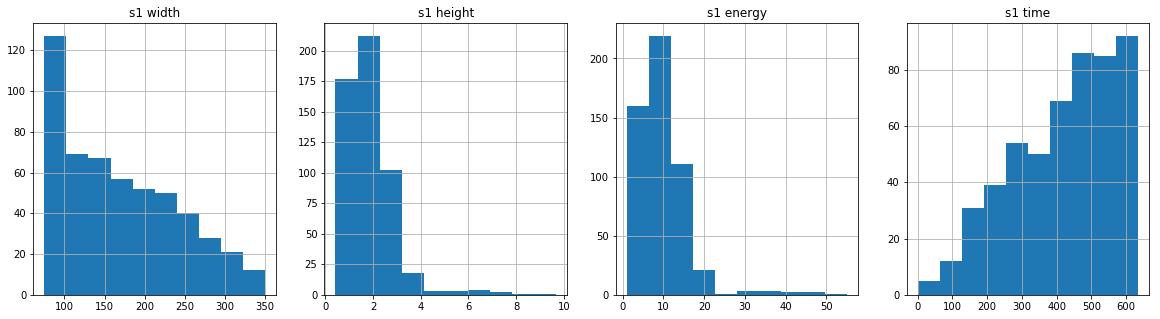

In [33]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S1w, dst.S1h, dst.S1e, dst.S1t], 
                   ['s1 width', 's1 height', 's1 energy', 's1 time']):
    plt.subplot(subplot)
    if lab=='s1 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    subplot+=1
plt.show()  

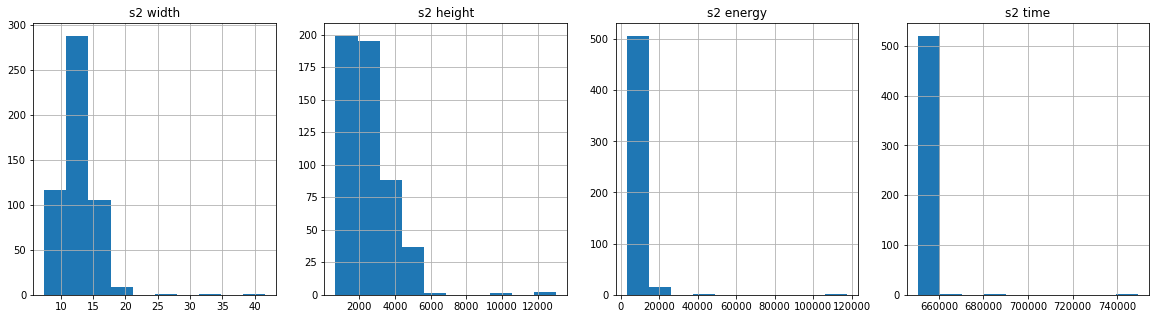

In [34]:
plt.figure(figsize=(20,5))
subplot=141
for feature, lab in zip([dst.S2w, dst.S2h, dst.S2e, dst.S2t], 
                   ['s2 width', 's2 height', 's2 energy', 's2 time']):
    plt.subplot(subplot)
    if lab=='s1 time':plt.hist(feature / units.mus)
    else:plt.hist(feature)
    plt.title(lab)
    plt.grid(True)
    #plt.yscale('log')
    subplot+=1
plt.show()  

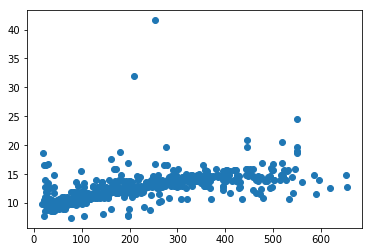

In [38]:
plt.scatter(dst.Z, dst.S2w)
plt.show()

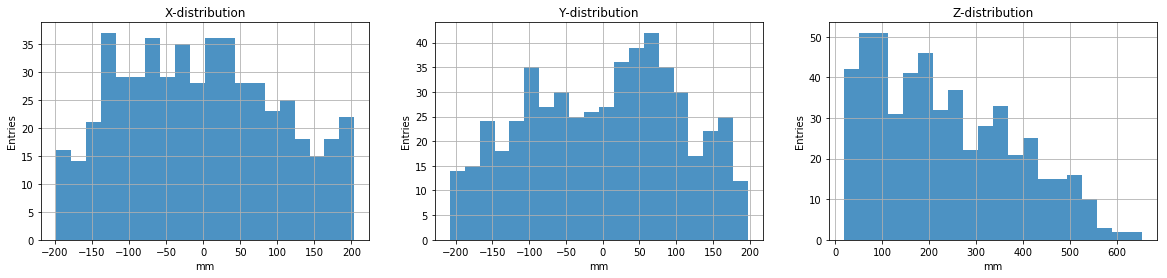

In [37]:
plt.figure(figsize=(20,4))
subplot=131
for feature, coord in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist(feature, bins=20, alpha=.8)
    plt.title(coord + '-distribution')
    plt.xlabel('mm')
    plt.ylabel('Entries')
    plt.grid(True)
    subplot+=1
plt.show()

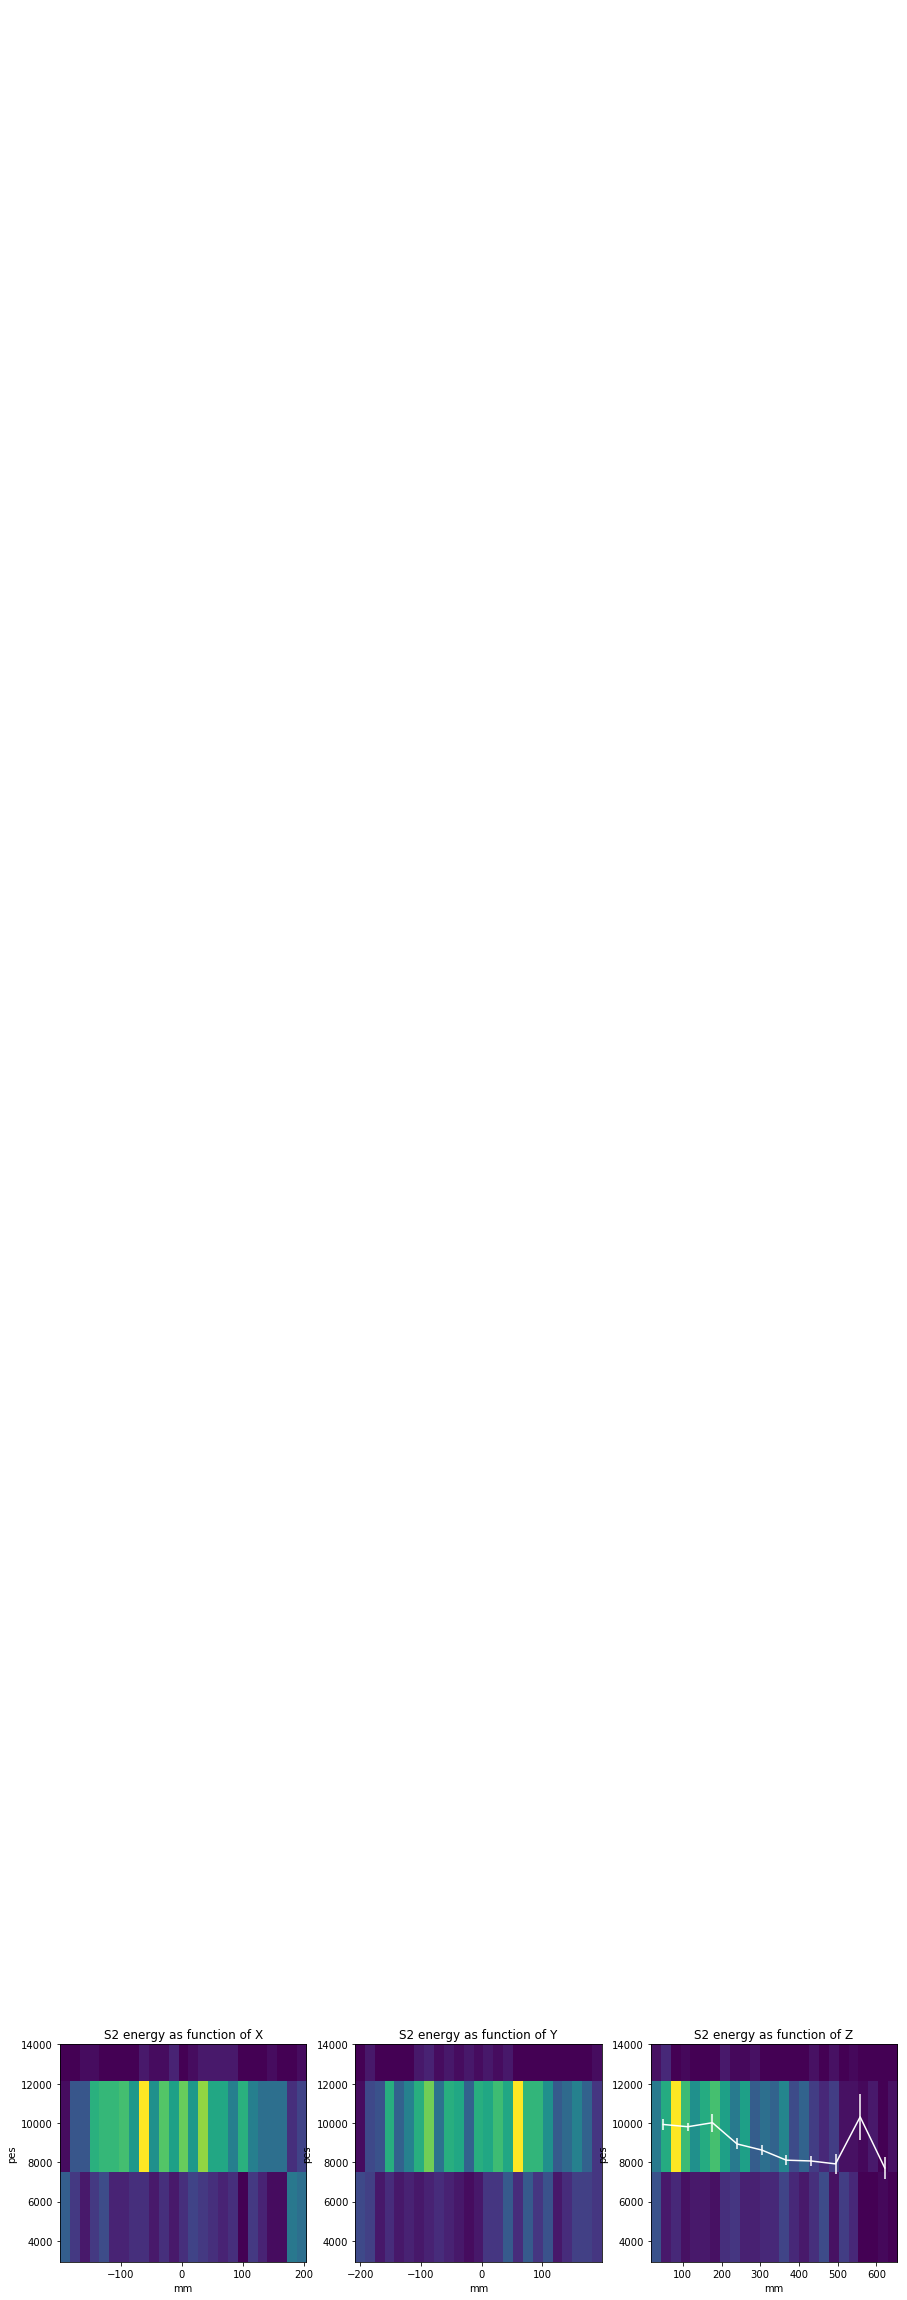

In [46]:
plt.figure(figsize=(15,4))
subplot=131
for feature, lab in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist2d(feature, dst.S2e, bins=25)

    if lab == 'Z':
        a = fitf.profileX(feature, dst.S2e, 10)
        plt.errorbar(*a, c='white')

    plt.title('S2 energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    plt.ylim(None,1.4e4)

    subplot+=1
plt.show()

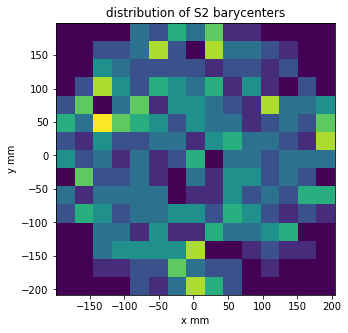

In [47]:
plt.figure(figsize=(5,5))
plt.hist2d(dst.X, dst.Y, bins=(15, 15))
plt.xlabel('x mm') 
plt.ylabel('y mm')
plt.title('distribution of S2 barycenters')
plt.show()

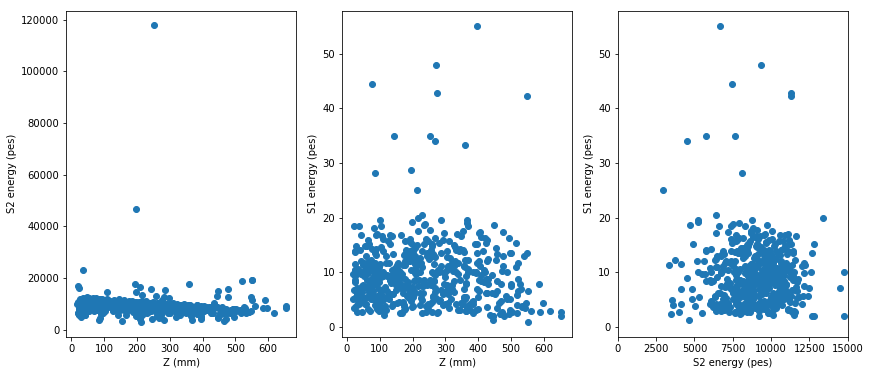

In [52]:
figsize=(14,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
#plt.hist2d(dst.Z, dst.S2e, bins=(25, 25))
plt.scatter(dst.Z, dst.S2e)
plt.xlabel('Z (mm)')
plt.ylabel('S2 energy (pes)')

ax = plt.subplot(1, 3, 2)
#plt.hist2d(dst.Z, dst.S1e, bins=(25, 25))
plt.scatter(dst.Z, dst.S1e)
plt.xlabel('Z (mm)')
plt.ylabel('S1 energy (pes)')

ax = plt.subplot(1, 3, 3)
#plt.hist2d(dst.S2e, dst.S1e, bins=(25, 25))
plt.scatter(dst.S2e, dst.S1e)
plt.xlabel('S2 energy (pes)')
plt.ylabel('S1 energy (pes)')
plt.xlim(0,1.5e4)
plt.show()

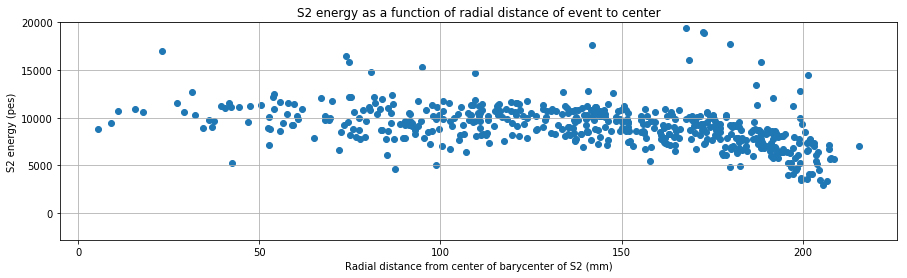

In [56]:
plt.figure(figsize=(15,4))
plt.scatter(dst.R, dst.S2e)
plt.grid(True)
plt.title('S2 energy as a function of radial distance of event to center')
plt.xlabel('Radial distance from center of barycenter of S2 (mm)')
plt.ylabel('S2 energy (pes)')
plt.ylim(None,20000)
plt.show()

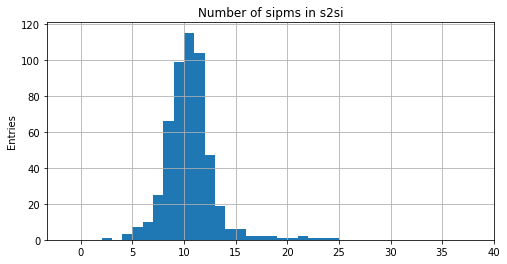

In [55]:
plt.figure(figsize=(8,4))
plt.hist(dst.Nsipm, bins=range(1, dst.Nsipm.max()+1))
plt.grid(True)
plt.xlim(None,40)
plt.ylabel('Entries')
plt.title('Number of sipms in s2si')
plt.show()